Machine Leaning Course vol.3
# ロジスティック回帰

今回は、Irisデータセットを用いて、ロジスティック回帰について勉強していきます。

In [110]:
# 必要モジュールのインポートをしておきます

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
sns.set_style('whitegrid')

## データセット 
機械学習のサンプルデータとして非常によく使われるデータセットがあります。
それが、[Iris（アヤメ）のデータ](http://en.wikipedia.org/wiki/Iris_flower_data_set) です。

このデータセットは、イギリスの統計学者ロナルド・フィッシャーによって、1936年に紹介されました。

3種類のアヤメについて、それぞれ50サンプルのデータがあります。それぞれ、Iris setosa、Iris virginica、Iris versicolorという名前がついています。全部で150のデータになっています。4つの特徴量が計測されていて、これが説明変数になります。4つのデータは、花びら（petals）と萼片（sepals）の長さと幅です。

[花びら（petals）と萼片（sepals）](https://ja.wikipedia.org/wiki/%E8%90%BC)

![](https://s3.amazonaws.com/ai-standard/pic3-2.png)

In [111]:
from sklearn.datasets import load_iris

# Irisデータのロード
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names

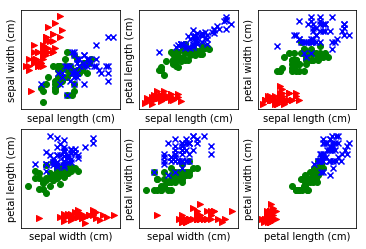

In [112]:
# Irisデータの表示
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (p0, p1) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    for t, marker, c in zip(list(range(3)), ">ox", "rgb"):
        plt.scatter(X[target == t, p0], X[target == t, p1], marker=marker, c=c)
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])

plt.show()

## データの前処理

機械学習ロードマップの「前処理」の部分を行います。
![](https://s3.amazonaws.com/ai-standard/mlrm-1.png)

#### データの分割
データを、トレーニングデータセットとテストデータセットに分割します。

scikit-learnには、データ分割の便利なモジュールがあるのでこれをつかいましょう。


~~~
train_test_split(特徴量[X], ラベル[Y], test_size= [テストデータの割合], random_state=[乱数生成のシード値])
~~~

In [113]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### データの整形
データはcmで統一されていますが、まずは平均を0、分散を1にする「標準化」という作業をしていきます。

##### 標準化ってなんでするの？？
標準化されてない生のデータセットは、数値の単位がバラバラ（mとｋｇ）だったらり、大きさが極端に違う（0.001と10000）などの特徴を持っていることが多いです。

このまま扱うと、特定の特徴量の影響が強く出てしまう場合があります。そこで、それぞれの特徴量のスケールを同じにそろえる作業（標準化）が必要になります。

これをすることによって、最適なパフォーマンスを実現するのに一歩近づくことになります。

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
scaler.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

scikit-learnでは他の学習器と同じインタフェースで「標準化」が実装されています。
学習したモデルを使ってデータを変換する（標準化する）ときはpredict( )ではなく、transform( )というメソッドが定義されています。

【注意点】
テストデータを標準化するときは、同じスケーリングパラメータを適応すること。
これは、トレーニングデータとテストデータの値を相互に比較できるようにするためです。

## ロジスティック回帰の適応
![](https://s3.amazonaws.com/ai-standard/mlrn-2.png)

In [129]:
from sklearn import linear_model

# 　モデルの適応・学習
LogicReg = linear_model.LogisticRegression(penalty='l1', C=10)
LogicReg.fit(X_train_std, y_train)
y_pred = LogicReg.predict(X_test_std)

# 誤分類の個数を表示
miss = (y_test!=y_pred).sum()
print("Number of miss classification : {}".format(miss))

Number of miss classification : 1


In [119]:
print('LogicReg :', LogicReg.score(X_test_std, y_test))

LogicReg : 0.977777777778
